# Customer Churn Analysis
##  Decision Tree Classification & Market basket analysis
### Ghofrane Ghanmi

**Introduction to the dataset:**
<br> Churn customers are the customers who are more likely to stop their engagement to a certain brand. This results in losing customers and maybe very profitable customers to companies. We study in this mini-project the dataset on a churn customer of one telecom company. The churn size represents 26.6%  of the company customers. We use decision tree classifier and apriori algorithm to discern the profile(s) of churn customers. The classifier's performance is evaluated to be more than 70% of the time accurate. Because the dataset is small, improving the performance relies on building the decision  tree classifier itself while using entropy for stratifying the tree. Using random forest does not increase accuracy in this case. 14 association rules were extracted to confirm the results obtained by the decision tree classfication process. These rules tell us thatbased on this customer dataset, there are strong relatioships betweeen the following four features: tenure (how many months were the client engaged with the company), monthly charges, total charges, and internet & phone services 
<br> More detailed conclusions are drawn at the bottom of the notebook


**Information about the dataset** <br>
The dataset has 7043 rows and 21 variables
The customerId variable is not informative
Target variable is the last column n°21 named 'Churn'
The dataset has 4 numerical variables and 16 categorical variables <br>
Features of the data are : customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn <br> <br>
**customerID**: Customer ID  
**gender**: Whether the customer is a male or a female    
**SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)  
**Partner**: Whether the customer has a partner or not (Yes, No)  
**Dependents**: Whether the customer has dependents or not (Yes, No)  
**tenure**: Number of months the customer has stayed with the company  
**PhoneService**: Whether the customer has a phone service or not (Yes, No)  
**MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)  
**InternetService**: Customer’s internet service provider (DSL, Fiber optic, No)  
**OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)  
**OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)  
**DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)  
**TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)  
**StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)  
**StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)  
**Contract**: The contract term of the customer (Month-to-month, One year, Two year)  
**PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)  
**PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
**MonthlyCharges**: The amount charged to the customer monthly  
**TotalCharges**: The total amount charged to the customer  
**Churn**: Whether the customer churned or not (Yes or No)
<br>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
rowd=pd.read_csv('Telecom Churn Customer.csv') #I will keep this dataframe intact as the original version
copyd=pd.read_csv('Telecom Churn Customer.csv') #I will work on this copy of the dataset

**Remove unecessary variables**

**Check types of data**

In [17]:
copyd.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [18]:
#TotalCharges is a numerical variables and should be changed to float
copyd['TotalCharges']=pd.to_numeric(copyd['TotalCharges'],errors='coerce')
#Remove empty cells and nan data
copyd=copyd.replace(" ", np.nan)
copyd.isna().sum()

copyd = copyd[copyd["TotalCharges"].notnull()]
copyd= copyd.reset_index()[copyd.columns]
#copyd['Churn']=copyd['Churn'].replace('Yes', 1)
#copyd['Churn']=copyd['Churn'].replace('No', 0)
#copyd['Churn']

**Randomly mix dataset rows**

In [19]:
from sklearn.utils import shuffle
import random
random.seed(40)
copyd=shuffle(copyd,random_state=np.random)

**Encode categorical variables**

In [20]:
#encode categorical variables because the classifiers that will be used later on work on numerical  data 
telco_dummies=pd.get_dummies(copyd, columns=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'],dummy_na=False,drop_first=True)


In [21]:
telco_dummies['Churn_Yes'].value_counts()

0    5163
1    1869
Name: Churn_Yes, dtype: int64

**Not churned customer size is nearly 2.7 the size of churned customers, which means the dataset is not balanced, and this unbalance will affect the classfication later on**


**Sclaing the data**

In [ ]:
telco_dummies=telco_dummies.drop(['customerID'],axis=1)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(telco_dummies)
scaler_features = scaler.transform(telco_dummies)

**Splitting and training the data**

In [23]:
X=telco_dummies.drop(['Churn_Yes'], axis=1)
Y=telco_dummies['Churn_Yes']

In [24]:
X.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.504693,0.482509,0.298493,0.903299,0.096701,0.421928,...,0.216155,0.384386,0.216155,0.388367,0.209329,0.239619,0.592719,0.216297,0.336320,0.228100
std,0.368844,24.545260,30.085974,2266.771362,0.500014,0.499729,0.457629,0.295571,0.295571,0.493902,...,0.411650,0.486484,0.411650,0.487414,0.406858,0.426881,0.491363,0.411748,0.472483,0.419637
min,0.000000,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 1995 to 2590
Data columns (total 30 columns):
SeniorCitizen                            7032 non-null int64
tenure                                   7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
gender_Male                              7032 non-null uint8
Partner_Yes                              7032 non-null uint8
Dependents_Yes                           7032 non-null uint8
PhoneService_Yes                         7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic              7032 non-null uint8
InternetService_No                       7032 non-null uint8
OnlineSecurity_No internet service       7032 non-null uint8
OnlineSecurity_Yes                       7032 non-null uint8
OnlineBackup_No internet service

**Building the Decision Tree classifier**

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0, splitter='best',criterion='entropy',max_depth=4, max_features=4)

In [27]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.25)

In [28]:
model=clf

In [29]:
#training the model on the train sets
model.fit(X_train ,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [30]:
predictions=clf.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
print(confusion_matrix(Y_test,predictions))

[[1213   70]
 [ 304  171]]


In [33]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))
from sklearn.metrics import classification_report
print('\n')
print(classification_report(Y_test,predictions))

0.7872582480091013


              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1283
           1       0.71      0.36      0.48       475

    accuracy                           0.79      1758
   macro avg       0.75      0.65      0.67      1758
weighted avg       0.78      0.79      0.76      1758



In [34]:
### accuracy in different level for entropy index
list_accuracy = []
for i in range(1,25):
  dtree = DecisionTreeClassifier(criterion='entropy',max_depth=i)
  dtree.fit(X_train,Y_train)
  pred= dtree.predict(X_test)
  acc = accuracy_score(Y_test,pred)*100
  list_accuracy.append(acc)
  print("Accuracy: {} % for depth= {}".format(acc,i))
print("\nMaximum Accuracy is {} % for depth= {}".format(max(list_accuracy),(list_accuracy.index(max(list_accuracy))+1)))


Accuracy: 72.9806598407281 % for depth= 1
Accuracy: 72.9806598407281 % for depth= 2
Accuracy: 77.07622298065984 % for depth= 3
Accuracy: 78.72582480091013 % for depth= 4
Accuracy: 78.72582480091013 % for depth= 5
Accuracy: 78.2707622298066 % for depth= 6
Accuracy: 77.64505119453925 % for depth= 7
Accuracy: 78.32764505119454 % for depth= 8
Accuracy: 78.839590443686 % for depth= 9
Accuracy: 77.7019340159272 % for depth= 10
Accuracy: 75.54038680318543 % for depth= 11
Accuracy: 75.71103526734926 % for depth= 12
Accuracy: 73.94766780432309 % for depth= 13
Accuracy: 74.17519908987485 % for depth= 14
Accuracy: 73.43572241183163 % for depth= 15
Accuracy: 73.83390216154721 % for depth= 16
Accuracy: 74.00455062571105 % for depth= 17
Accuracy: 73.37883959044369 % for depth= 18
Accuracy: 73.32195676905575 % for depth= 19
Accuracy: 73.60637087599545 % for depth= 20
Accuracy: 73.6632536973834 % for depth= 21
Accuracy: 73.72013651877133 % for depth= 22
Accuracy: 73.09442548350398 % for depth= 23
Accu

## Tree Visualization

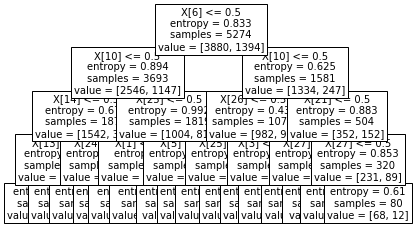

In [35]:
from sklearn import tree 
tree.plot_tree(clf, fontsize=10)
plt.savefig('classifier.png')


## Visualize decision tree with pydotplus & graphviz software

In [36]:
features=list(X.columns)
features
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image  
import pydotplus


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:
features

In [37]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import graphviz
!set PATH=PATH;C:\Users\DELL\Downloads\graphviz-2.38\release

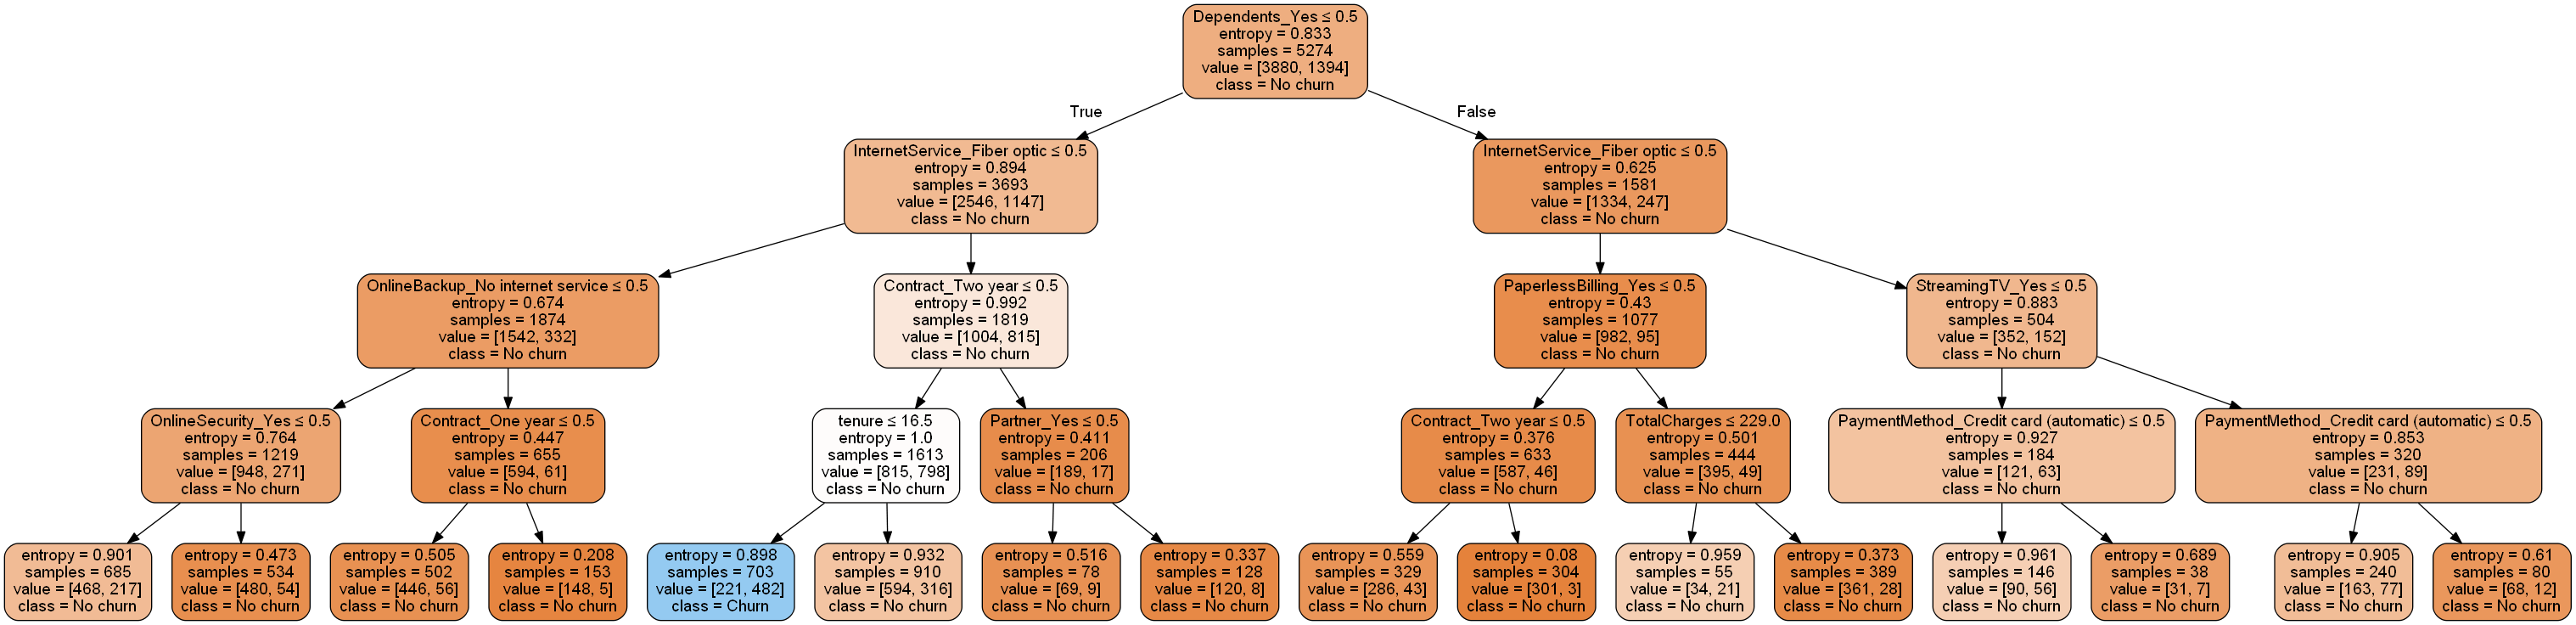

In [38]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =features,class_names=['No churn','Churn'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

## Market Basket Analysis of customer churn dataset
### Extracting the profile of customers who are more likely to change telecom brand
### Use APRIORI algorithm and association rules to extract the patterns and rules in the data 

In [39]:
import pandas as pd
from mlxtend.frequent_patterns import  apriori,association_rules 
import io


**Transform Variables to binary because Apriori algorithm supports only a dataframe of 0 & 1 or True & False**

In [40]:
telco_dummies.head(10)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
1995,0,49,100.85,4847.35,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0
1104,0,4,69.55,284.90,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2546,0,41,81.30,3190.65,0,0,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3995,0,49,19.45,921.30,0,0,1,1,0,0,...,0,1,0,1,0,0,1,0,0,0
5692,0,2,89.55,185.55,1,1,1,1,0,0,...,1,0,1,0,0,1,0,0,0,1
4185,0,1,60.15,60.15,0,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,1
6946,0,1,74.60,74.60,1,1,0,1,0,1,...,0,0,0,0,0,1,0,0,0,1
1084,0,11,70.20,760.05,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2853,0,58,94.30,5610.15,0,1,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
393,0,13,84.60,1115.20,0,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,1


**Hot Encoding**

In [41]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [42]:
df=telco_dummies
df_1=df[df['Churn_Yes']==1]
df_0=df[df['Churn_Yes']==0]

In [43]:
# Encoding the datasets 
df_encoded = df.applymap(hot_encode) 


df_0_encoded= df_0.applymap(hot_encode) 

df_1_encoded = df_1.applymap(hot_encode) 

In [44]:
# Building the model when churn is 1
# min_confidence=0.25, max_length=5, min_length=2
frq_items = apriori(df_1_encoded, min_support = 0.90,use_colnames=True) 

# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
freq_items=frq_items.sort_values(['support'], ascending=False)
frq_items

,support,itemsets
0,1.000000,(tenure)
1,1.000000,(MonthlyCharges)
2,1.000000,(TotalCharges)
3,0.909042,(PhoneService_Yes)
4,1.000000,(Churn_Yes)
5,1.000000,"(tenure, MonthlyCharges)"
6,1.000000,"(TotalCharges, tenure)"
7,0.909042,"(PhoneService_Yes, tenure)"
8,1.000000,"(tenure, Churn_Yes)"
9,1.000000,"(TotalCharges, MonthlyCharges)"


In [45]:
# Building the model for the original dataset
frq_items = apriori(df_encoded, min_support = 0.70,  use_colnames = True) 

# Collecting the rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
freq_items=frq_items.sort_values(['support'], ascending=False)
freq_items
rules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 9 columns):
antecedents           50 non-null object
consequents           50 non-null object
antecedent support    50 non-null float64
consequent support    50 non-null float64
support               50 non-null float64
confidence            50 non-null float64
lift                  50 non-null float64
leverage              50 non-null float64
conviction            50 non-null float64
dtypes: float64(7), object(2)
memory usage: 3.9+ KB


In [46]:
confidence=rules.as_matrix(columns=['confidence'])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


**Remove duplicate rules**

In [47]:
rules=rules.drop_duplicates(subset='antecedents',keep='first')
rules.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 0 to 39
Data columns (total 9 columns):
antecedents           14 non-null object
consequents           14 non-null object
antecedent support    14 non-null float64
consequent support    14 non-null float64
support               14 non-null float64
confidence            14 non-null float64
lift                  14 non-null float64
leverage              14 non-null float64
conviction            14 non-null float64
dtypes: float64(7), object(2)
memory usage: 1.1+ KB


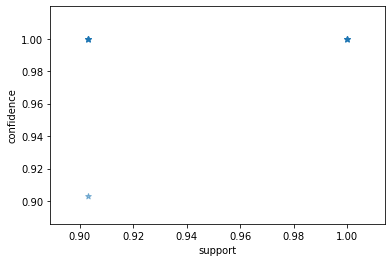

In [48]:
plt.scatter(rules['support'],rules ['confidence'],   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

In [49]:
from sklearn.tree.export import export_text
tree_rules = export_text(clf, feature_names=list(X_train))
tree_rules

'|--- Dependents_Yes <= 0.50\n|   |--- InternetService_Fiber optic <= 0.50\n|   |   |--- OnlineBackup_No internet service <= 0.50\n|   |   |   |--- OnlineSecurity_Yes <= 0.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- OnlineSecurity_Yes >  0.50\n|   |   |   |   |--- class: 0\n|   |   |--- OnlineBackup_No internet service >  0.50\n|   |   |   |--- Contract_One year <= 0.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- Contract_One year >  0.50\n|   |   |   |   |--- class: 0\n|   |--- InternetService_Fiber optic >  0.50\n|   |   |--- Contract_Two year <= 0.50\n|   |   |   |--- tenure <= 16.50\n|   |   |   |   |--- class: 1\n|   |   |   |--- tenure >  16.50\n|   |   |   |   |--- class: 0\n|   |   |--- Contract_Two year >  0.50\n|   |   |   |--- Partner_Yes <= 0.50\n|   |   |   |   |--- class: 0\n|   |   |   |--- Partner_Yes >  0.50\n|   |   |   |   |--- class: 0\n|--- Dependents_Yes >  0.50\n|   |--- InternetService_Fiber optic <= 0.50\n|   |   |--- PaperlessBilling_Yes <= 0.50\n

**Visualize Association rules detected in the data // patterns of the data**

In [52]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()
   
  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
             
            G1.add_nodes_from(rules)
            
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')       
 
 
   
  edges = G1.edges()
  colors = [G1[u][v]['color'] for u,v in edges]
  weights = [G1[u][v]['weight'] for u,v in edges]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()
  plt.figure(figsize=(100,60))

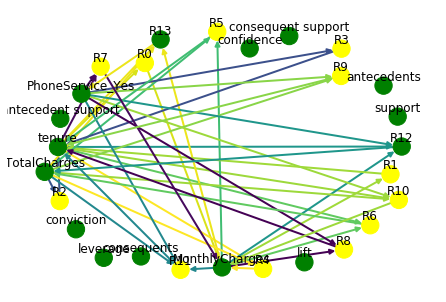

<Figure size 7200x4320 with 0 Axes>

In [53]:
plt.gcf().clear()
draw_graph(rules,14)

In [ ]:
rules[['antecedents','consequents']]
    

## Conclusions and Analysis of Customer Churn Profile

Based on the decision tree, customers who are at high risk of churn are two types: <br>
Customers who have: <br>
   <ul> <li>short contracts for less than a year</li> <br>
    <li> dependents</li> <br>
   <li> No internet services like fiber optic </li><br>
   <li> have been with the brand for a short period that is less than 16.5 months : low tenure </li> </ul><br> <br>
Other customers who have: 
    <ul><li>long engagements: two-year contracts</li>
    <li>Total charges less than 7862.525</li>
   <li> Monthly charges between 93.55 and 94.2, which is higher than the mean monthly charges by nearly one standard deviation </li></ul><br> <br>
**Churn profile ONE** seems to be the client who has a limited and recent experience with the brand: short engagement, limited range of services bought from the brand.<br>
**Churn profile TWO** seems to be the client who has been engaged with the brand for more than a year, but is concerned with the high monthly fees charged on him/her.Such a client of the second profile is deranged by the extra money he pays and starts to think about the advantages provided by the competition <br> <br>
On this account, telecom brands should develop creative and up to date approaches to preserve these high risk customers. <br> <br>
Telecom companies should encourage the first profile to engage with the brand, research their needs and their specific profiles, then match the company services to these needs
telecom companies should pay close attention to the behavior of their old customers of the second profile and provide them with dicounts, incentives, a wider and better quality of services 
Obviously, research and analysis of data related to the specific services and profiles of these high risk customers is required to find better solutions for churn issue.

In [ ]:
new_clt=telco_dummies[['tenure']]<12
new_clt.sum()
old_clt=telco_dummies[['tenure']]>=12
new_clt.sum()

The fact that features that explain best customer attrition confirm that the type of churn studied here is voluntary. Also, churn profiles extracted prove that keeping an old customer costs less than getting a new one. <br> The churn profiles are as follow : **29.3%** are **new customers** and **70.73%** are **old highly profitable customers** noting that they have been paying more than the average monthly fee by 30$ (one std). This helps the company develop its future marketing company. It is more profitable and less costly to target the old customers and work on attracting them than to work on new customers who are just 30%  of the churn size.